In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create element tree object 
tree = ET.parse('apple_health_export/exportar.xml') 

In [3]:
# extract the attributes of health record
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]
record_list

[{'type': 'HKQuantityTypeIdentifierBodyMassIndex',
  'sourceName': 'Zepp Life',
  'sourceVersion': '202203221509',
  'unit': 'count',
  'creationDate': '2022-04-22 17:01:41 -0300',
  'startDate': '2022-04-22 14:00:58 -0300',
  'endDate': '2022-04-22 14:00:58 -0300',
  'value': '22.6627'},
 {'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'iPhone (8)',
  'sourceVersion': '16.1.1',
  'unit': 'cm',
  'creationDate': '2023-01-03 14:40:15 -0300',
  'startDate': '2023-01-03 14:40:15 -0300',
  'endDate': '2023-01-03 14:40:15 -0300',
  'value': '178'},
 {'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Saúde',
  'sourceVersion': '11.2.1',
  'unit': 'cm',
  'creationDate': '2018-06-23 12:17:05 -0300',
  'startDate': '2018-06-23 12:16:00 -0300',
  'endDate': '2018-06-23 12:16:00 -0300',
  'value': '175'},
 {'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Saúde',
  'sourceVersion': '10.0.1',
  'unit': 'cm',
  'creationDate': '2016-09-19 22:41:53 -0300',
  'startDate

In [4]:
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)

# print the information of record_data
print(record_data.info())

# show the record_data DataFrame
display(record_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321443 entries, 0 to 1321442
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1321443 non-null  object
 1   sourceName     1321443 non-null  object
 2   sourceVersion  1321443 non-null  object
 3   unit           1308453 non-null  object
 4   creationDate   1321443 non-null  object
 5   startDate      1321443 non-null  object
 6   endDate        1321443 non-null  object
 7   value          1321443 non-null  object
 8   device         920470 non-null   object
dtypes: object(9)
memory usage: 90.7+ MB
None


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierBodyMassIndex,Zepp Life,202203221509,count,2022-04-22 17:01:41 -0300,2022-04-22 14:00:58 -0300,2022-04-22 14:00:58 -0300,22.6627,NaN
1,HKQuantityTypeIdentifierHeight,iPhone (8),16.1.1,cm,2023-01-03 14:40:15 -0300,2023-01-03 14:40:15 -0300,2023-01-03 14:40:15 -0300,178,NaN
2,HKQuantityTypeIdentifierHeight,Saúde,11.2.1,cm,2018-06-23 12:17:05 -0300,2018-06-23 12:16:00 -0300,2018-06-23 12:16:00 -0300,175,NaN
3,HKQuantityTypeIdentifierHeight,Saúde,10.0.1,cm,2016-09-19 22:41:53 -0300,2016-09-19 22:41:53 -0300,2016-09-19 22:41:53 -0300,167,NaN
4,HKQuantityTypeIdentifierHeight,Apple Watch de Edson,10.4,cm,2024-04-27 23:19:57 -0300,2024-04-27 23:19:57 -0300,2024-04-27 23:19:57 -0300,178,NaN
...,...,...,...,...,...,...,...,...,...
1321438,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Apple Watch de Edson,10.5,ms,2024-08-15 07:31:56 -0300,2024-08-15 07:30:56 -0300,2024-08-15 07:31:55 -0300,29.7119,"<<HKDevice: 0x3015745a0>, name:Apple Watch, ma..."
1321439,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Apple Watch de Edson,10.5,ms,2024-08-15 09:31:57 -0300,2024-08-15 09:30:56 -0300,2024-08-15 09:31:56 -0300,67.7189,"<<HKDevice: 0x3015745a0>, name:Apple Watch, ma..."
1321440,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Apple Watch de Edson,10.5,ms,2024-08-15 11:32:49 -0300,2024-08-15 11:31:48 -0300,2024-08-15 11:32:48 -0300,79.3807,"<<HKDevice: 0x3015745a0>, name:Apple Watch, ma..."
1321441,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Apple Watch de Edson,10.5,ms,2024-08-15 14:10:12 -0300,2024-08-15 14:09:12 -0300,2024-08-15 14:10:11 -0300,42.9472,"<<HKDevice: 0x3015745a0>, name:Apple Watch, ma..."


In [5]:
# unique elements in 'type' column of record_data
record_data.type.unique()

array(['HKQuantityTypeIdentifierBodyMassIndex',
       'HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierOxygenSaturation',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierS

In [6]:
# return recorded Active Energy Burned
record_data.loc[(record_data['type'].str.contains("ActiveEnergyBurned"))]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
879006,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (8),16.3.1,Cal,2023-10-19 16:34:13 -0300,2023-10-19 16:22:22 -0300,2023-10-19 16:22:32 -0300,0.014,"<<HKDevice: 0x30163e710>, name:iPhone, manufac..."
879007,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (8),16.3.1,Cal,2023-10-19 16:45:19 -0300,2023-10-19 16:33:30 -0300,2023-10-19 16:33:40 -0300,0.016,"<<HKDevice: 0x30163e710>, name:iPhone, manufac..."
879008,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (8),16.3.1,Cal,2023-10-19 17:08:17 -0300,2023-10-19 16:53:45 -0300,2023-10-19 16:53:55 -0300,0.012,"<<HKDevice: 0x30163e710>, name:iPhone, manufac..."
879009,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (8),16.3.1,Cal,2023-10-19 17:19:05 -0300,2023-10-19 17:08:02 -0300,2023-10-19 17:15:56 -0300,2.633,"<<HKDevice: 0x30163e710>, name:iPhone, manufac..."
879010,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (8),16.3.1,Cal,2023-10-19 17:33:36 -0300,2023-10-19 17:22:56 -0300,2023-10-19 17:31:20 -0300,0.146,"<<HKDevice: 0x30163e710>, name:iPhone, manufac..."
...,...,...,...,...,...,...,...,...,...
1134855,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch de Edson,10.5,Cal,2024-08-15 19:12:49 -0300,2024-08-15 19:11:11 -0300,2024-08-15 19:12:02 -0300,0.335,"<<HKDevice: 0x30163d7c0>, name:Apple Watch, ma..."
1134856,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch de Edson,10.5,Cal,2024-08-15 19:13:12 -0300,2024-08-15 19:12:02 -0300,2024-08-15 19:12:43 -0300,0.169,"<<HKDevice: 0x30163d7c0>, name:Apple Watch, ma..."
1134857,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch de Edson,10.5,Cal,2024-08-15 19:13:55 -0300,2024-08-15 19:12:43 -0300,2024-08-15 19:13:34 -0300,0.41,"<<HKDevice: 0x30163d7c0>, name:Apple Watch, ma..."
1134858,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch de Edson,10.5,Cal,2024-08-15 19:15:00 -0300,2024-08-15 19:13:34 -0300,2024-08-15 19:14:25 -0300,0.335,"<<HKDevice: 0x30163d7c0>, name:Apple Watch, ma..."


In [7]:
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)

# transform 'startDate' into date format 
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')
record_data_cleaned['Hour'] = pd.to_datetime(record_data['startDate']).dt.strftime('%H')

# value is numeric, NaN if fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')

# reorder 'record_data' columns
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month', 'Hour', 'value','unit']]

In [8]:
# dictionary of DataFrames for filtered 'record_data'
record_data_df_dict = {}

# filter 'type' of 'record_data'
record_types = [
   'BodyMass',
   'ActiveEnergyBurned',
   'BasalEnergyBurned',
   'DistanceWalkingRunning',
   'StepCount',
   'AppleStandTime',
   'WalkingSpeed',
   'RunningSpeed',
   'HeartRateVariabilitySDNN',
   'RestingHeartRate',
   'WalkingHeartRateAverage',
   'VO2Max',
   'HeartRateRecoveryOneMinute'
   ]


# create new DataFrame for every interested data
for record_type in record_types:
   record_data_df_dict[record_type] = record_data_cleaned.loc[(record_data_cleaned['type'].str.contains(record_type))].rename(columns={"value":record_type}).sort_values(by='Date')

In [9]:
# list of data 'type' that need to be summed daily
key_get_sum = [
    'BasalEnergyBurned', 
    'ActiveEnergyBurned',
    'DistanceWalkingRunning',
    'StepCount',
    'AppleStandTime'
    ]

record_data_df_dict_daily = {}
for key in key_get_sum:
    record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()

In [10]:
record_data_df_dict_monthly = {}
for key in key_get_sum:
    record_data_df_dict_monthly[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date'].str[:-3]).agg({key: 'sum', 'Month': lambda x: x.mode().iat[0]}).reset_index()

In [11]:
# Before vs After Workout
# Workout routine starts from 1 September 2022 ->= data filter after workout are specified starts on this date

initial_date = '2024-05-01'
cutoff_date = '2024-07-01'

# Body mass progress before and after Workout
record_data_df_BodyMass_start_Sep22 = record_data_df_dict["BodyMass"].loc[(record_data_df_dict["BodyMass"]['Date'] >= cutoff_date)]

#Active Energy Burned before and after workout routine
record_data_df_ActiveEnergyBurned_before_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] < cutoff_date) & (record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= initial_date)]
record_data_df_ActiveEnergyBurned_after_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= cutoff_date)]

# Basal Energy Burned before and after workout routine
record_data_df_BasalEnergyBurned_before_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] < cutoff_date) & (record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= initial_date)]
record_data_df_BasalEnergyBurned_after_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] >= cutoff_date)]

# Distance Walking-Running before and after workout routine
record_data_df_Distance_before_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] < cutoff_date) & (record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= initial_date)]
record_data_df_Distance_after_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] >= cutoff_date)]

# Step count before and after workout routine
record_data_df_StepCount_before_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] < cutoff_date) & (record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= initial_date)]
record_data_df_StepCount_after_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] >= cutoff_date)]

In [12]:
final_workout_dict = []
workout_list = list(root.iter('Workout'))

for i in range(len(workout_list)):
    workout_dict = workout_list[i].attrib
    WorkoutStatisticsList = list(workout_list[i].iter("WorkoutStatistics"))

    for i, WorkoutStatistics in enumerate(WorkoutStatisticsList):
        if "ActiveEnergyBurned" in WorkoutStatistics.attrib['type']:
            workout_dict['activeEnergyBurned'] = WorkoutStatistics.attrib['sum']
        if "BasalEnergyBurned" in WorkoutStatistics.attrib['type']:
            workout_dict['basalEnergyBurned'] = WorkoutStatistics.attrib['sum']

    final_workout_dict.append(workout_dict)

final_workout_df = pd.DataFrame(final_workout_dict) #create final_workout_df dataframe
final_workout_df.head

<bound method NDFrame.head of                                   workoutActivityType           duration  \
0                        HKWorkoutActivityTypeRunning  30.15921667019526   
1                        HKWorkoutActivityTypeRunning  21.86666666666667   
2                        HKWorkoutActivityTypeRunning  36.88333333333333   
3                        HKWorkoutActivityTypeRunning  23.31666666666667   
4                        HKWorkoutActivityTypeRunning  24.73333333333333   
..                                                ...                ...   
150                     HKWorkoutActivityTypeCooldown  13.52610140045484   
151  HKWorkoutActivityTypeTraditionalStrengthTraining  50.34153740008672   
152                       HKWorkoutActivityTypeTennis  67.50711810191473   
153                      HKWorkoutActivityTypeRunning  40.19243620038033   
154  HKWorkoutActivityTypeTraditionalStrengthTraining  49.78368768294652   

    durationUnit            sourceName sourceVersion  \
0

In [13]:
#drop 'creationDate' and 'endDate' column
final_workout_df_cleaned = final_workout_df.drop(['sourceName','sourceVersion', 'device', 'creationDate', 'endDate'], axis=1)

# transform creationDate into date format 
final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%Y-%m-%d')
final_workout_df_cleaned['Day'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%A')
final_workout_df_cleaned['Hour'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%H')

# rename Activity Type
final_workout_df_cleaned['workoutActivityType'] = final_workout_df['workoutActivityType'].str.replace('HKWorkoutActivityType','')

# # reorder column
final_workout_df_cleaned = final_workout_df_cleaned[['Day', 'Date', 'Hour', 'workoutActivityType', 'duration', 'durationUnit', 'activeEnergyBurned', 'basalEnergyBurned']]

# transform data type of 'duration' from object into float
final_workout_df_cleaned['duration'] = final_workout_df['duration'].astype(float)

# transform data type of 'activeEnergyBurned' and 'basalEnergyBurned' from object into float
final_workout_df_cleaned['activeEnergyBurned'] = final_workout_df['activeEnergyBurned'].astype(float)
final_workout_df_cleaned['basalEnergyBurned'] = final_workout_df['basalEnergyBurned'].astype(float)

display(final_workout_df_cleaned)

,Day,Date,Hour,workoutActivityType,duration,durationUnit,activeEnergyBurned,basalEnergyBurned
0,Tuesday,2023-09-26,21,Running,30.159217,min,NaN,NaN
1,Sunday,2024-03-31,18,Running,21.866667,min,288.4980,NaN
2,Tuesday,2024-04-16,19,Running,36.883333,min,533.0840,NaN
3,Thursday,2024-04-18,19,Running,23.316667,min,319.7510,NaN
4,Tuesday,2024-04-23,19,Running,24.733333,min,355.7090,NaN
...,...,...,...,...,...,...,...,...
150,Tuesday,2024-08-13,20,Cooldown,13.526101,min,95.6831,22.8371
151,Wednesday,2024-08-14,18,TraditionalStrengthTraining,50.341537,min,417.9940,85.0512
152,Wednesday,2024-08-14,19,Tennis,67.507118,min,405.5220,113.5230
153,Thursday,2024-08-15,16,Running,40.192436,min,393.8740,67.7847


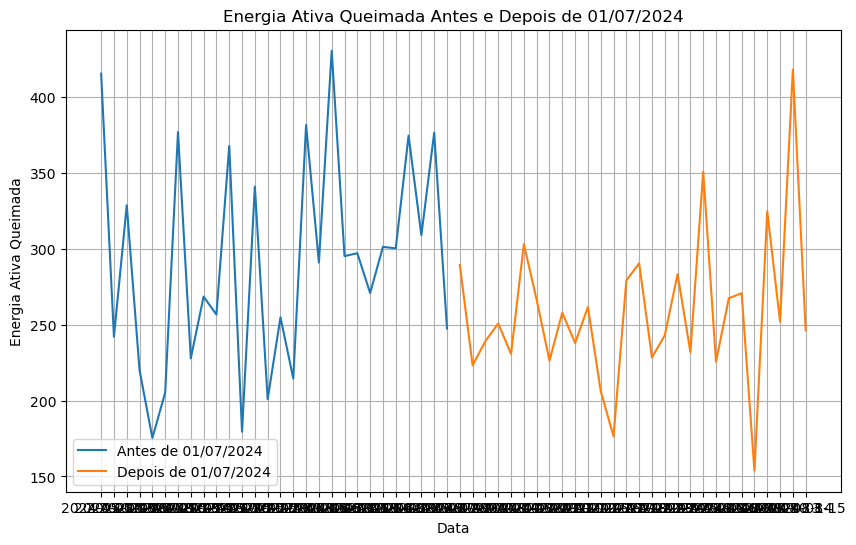

In [14]:
training = final_workout_df_cleaned[final_workout_df_cleaned['workoutActivityType'] == 'TraditionalStrengthTraining']

import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados
before_date = training[training['Date'] < '2024-07-01']
after_date = training[training['Date'] >= '2024-07-01']

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.plot(before_date['Date'], before_date['activeEnergyBurned'], label='Antes de 01/07/2024')
plt.plot(after_date['Date'], after_date['activeEnergyBurned'], label='Depois de 01/07/2024')

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Energia Ativa Queimada')
plt.title('Energia Ativa Queimada Antes e Depois de 01/07/2024')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
final_workout_df_cleaned['workoutActivityType'].value_counts()

TraditionalStrengthTraining    56
Running                        32
Tennis                         28
CoreTraining                   13
Walking                        11
Cycling                         6
StairClimbing                   4
FunctionalStrengthTraining      2
Soccer                          1
Basketball                      1
Cooldown                        1
Name: workoutActivityType, dtype: int64

In [16]:
# filter workout data starts from when the regular workout was started (September 2022)
workout_routine_df = final_workout_df_cleaned.loc[(final_workout_df_cleaned['Date'] >= cutoff_date)]
display(workout_routine_df)

,Day,Date,Hour,workoutActivityType,duration,durationUnit,activeEnergyBurned,basalEnergyBurned
78,Monday,2024-07-01,18,TraditionalStrengthTraining,43.238529,min,289.2830,72.8869
79,Monday,2024-07-01,19,Tennis,53.006516,min,541.3280,89.5749
80,Tuesday,2024-07-02,18,TraditionalStrengthTraining,45.554839,min,223.1790,76.6054
81,Tuesday,2024-07-02,19,Running,19.833934,min,269.0640,33.3252
82,Wednesday,2024-07-03,18,TraditionalStrengthTraining,40.323907,min,239.1660,67.9440
...,...,...,...,...,...,...,...,...
150,Tuesday,2024-08-13,20,Cooldown,13.526101,min,95.6831,22.8371
151,Wednesday,2024-08-14,18,TraditionalStrengthTraining,50.341537,min,417.9940,85.0512
152,Wednesday,2024-08-14,19,Tennis,67.507118,min,405.5220,113.5230
153,Thursday,2024-08-15,16,Running,40.192436,min,393.8740,67.7847


In [17]:
tennis_workout_df = workout_routine_df.loc[(workout_routine_df['workoutActivityType'].str.contains('Running'))]

fig = make_subplots(rows=2, cols=1, subplot_titles=("Active Energy Burned", "Basal Energy Burned"))
fig.add_trace(go.Scatter(x=record_data_df_ActiveEnergyBurned_before_workout['Date'], y=record_data_df_ActiveEnergyBurned_before_workout['ActiveEnergyBurned'], mode='lines+markers', name='Before Workout'), row=1, col=1)
fig.add_trace(go.Scatter(x=record_data_df_ActiveEnergyBurned_after_workout['Date'], y=record_data_df_ActiveEnergyBurned_after_workout['ActiveEnergyBurned'], mode='lines+markers', name='After Workout'), row=1, col=1)

fig.add_trace(go.Scatter(x=record_data_df_BasalEnergyBurned_before_workout['Date'], y=record_data_df_BasalEnergyBurned_before_workout['BasalEnergyBurned'], mode='lines+markers', name='Before Workout'), row=2, col=1)
fig.add_trace(go.Scatter(x=record_data_df_BasalEnergyBurned_after_workout['Date'], y=record_data_df_BasalEnergyBurned_after_workout['BasalEnergyBurned'], mode='lines+markers', name='After Workout'), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Energy Burned Before and After Workout Routine")
fig.show()

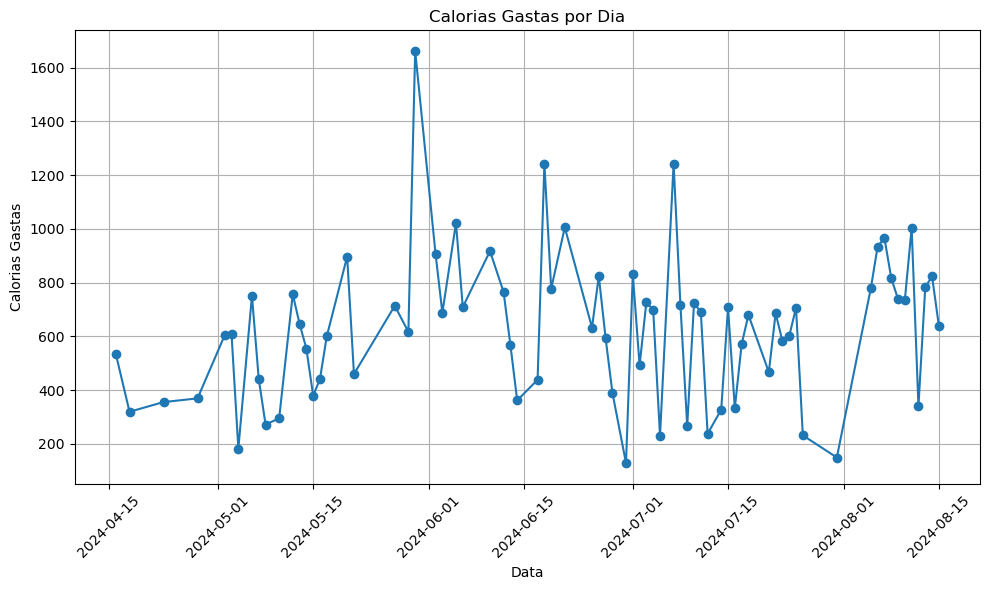

In [18]:
# Supondo que final_workout_df_cleaned já esteja carregado e tenha uma coluna 'date' e 'activeEnergyBurned'
final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df_cleaned['Date'])

df = final_workout_df_cleaned.copy()
df = df[df['Date'] >= '2024-04-01']

# Agrupar por dia e somar as calorias gastas
daily_calories = df.groupby(df['Date'].dt.date)['activeEnergyBurned'].sum().reset_index()

# Renomear colunas para clareza
daily_calories.columns = ['Date', 'totalCaloriesBurned']

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.plot(daily_calories['Date'], daily_calories['totalCaloriesBurned'], marker='o')

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Calorias Gastas')
plt.title('Calorias Gastas por Dia')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

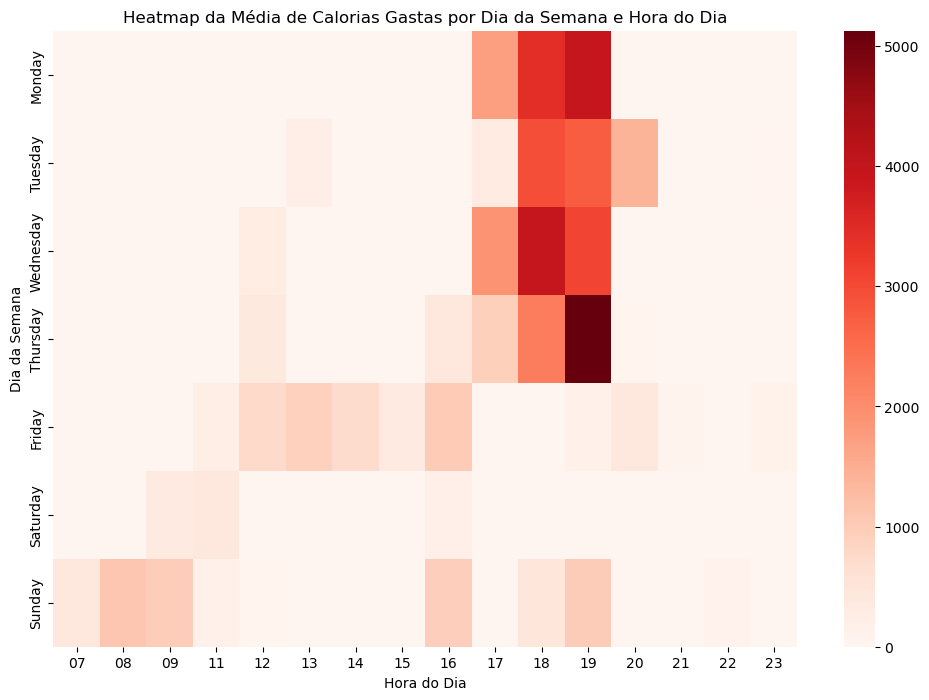

In [20]:
# Supondo que final_workout_df_cleaned já esteja carregado e tenha uma coluna 'Date' e 'activeEnergyBurned'
final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df_cleaned['Date'])

df = final_workout_df_cleaned.copy()
df = df[df['Date'] >= '2024-04-01']

# Agrupar por dia da semana e hora do dia e somar as calorias gastas
heatmap_data = df.groupby(['Day', 'Hour'])['activeEnergyBurned'].sum().unstack().fillna(0)

# Reordenar os dias da semana
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, fmt=".1f")

# Configurações do gráfico
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.title('Heatmap da Média de Calorias Gastas por Dia da Semana e Hora do Dia')
plt.show()